In [2]:
import pandas as pd
import os

# Define file paths
processed_data_dir = "../data/processed_data/"

# locating the paths
transactions_path = os.path.join(processed_data_dir, "processed_transactions.csv")
users_path = os.path.join(processed_data_dir, "processed_users.csv")
mcc_lookup_path = os.path.join(processed_data_dir, "mcc_lookup.pkl")

# Loading the datasets
transactions_df = pd.read_csv(transactions_path)
users_df = pd.read_csv(users_path)
mcc_lookup = pd.read_pickle(mcc_lookup_path)  # This is a dictionary

# Display basic info about each dataset
print("\n *Transactions Data Info:")
print(transactions_df.info(), "\n")
print(transactions_df.head(), "\n")

print("\n *Users Data Info:")
print(users_df.info(), "\n")
print(users_df.head(), "\n")

print("\n *MCC Lookup Sample:")
print(type(mcc_lookup))  # Should be dict
print(list(mcc_lookup.items())[:5])  # Display first 5 mappings


 *Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   date                         object 
 2   client_id                    int64  
 3   card_id                      int64  
 4   amount                       float64
 5   merchant_id                  int64  
 6   year                         int64  
 7   month                        int64  
 8   day                          int64  
 9   weekday                      object 
 10  weekday_num                  int64  
 11  is_refund                    int64  
 12  mcc_freq                     float64
 13  merchant_city_freq           float64
 14  use_chip_Online Transaction  bool   
 15  use_chip_Swipe Transaction   bool   
 16  amount_log                   float64
 17  weekday_encoded              float64
dtypes: bool(2), f

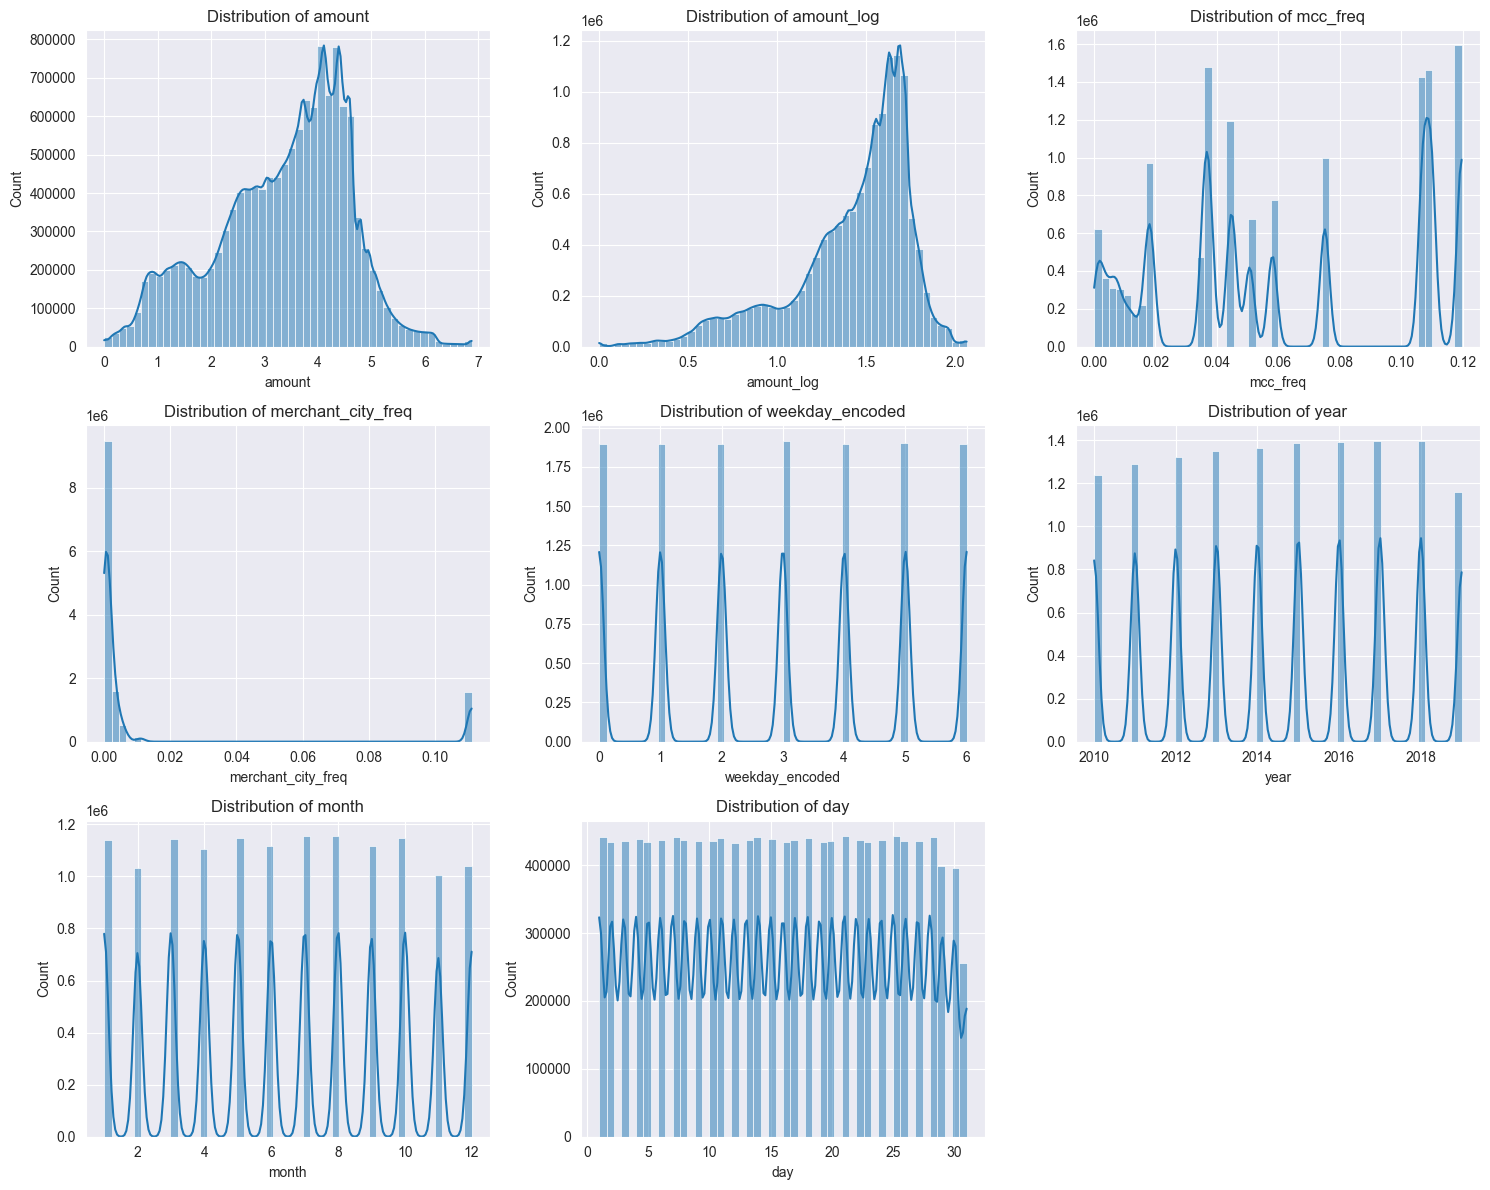

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed transactions dataset
transactions_path = "../data/processed_data/processed_transactions.csv"
transactions_df = pd.read_csv(transactions_path)

# Define numerical features to explore
numerical_features = ["amount", "amount_log", "mcc_freq", "merchant_city_freq",
                      "weekday_encoded", "year", "month", "day"]

# Set up the plotting grid
plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of plots
    sns.histplot(transactions_df[feature], kde=True, bins=50)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

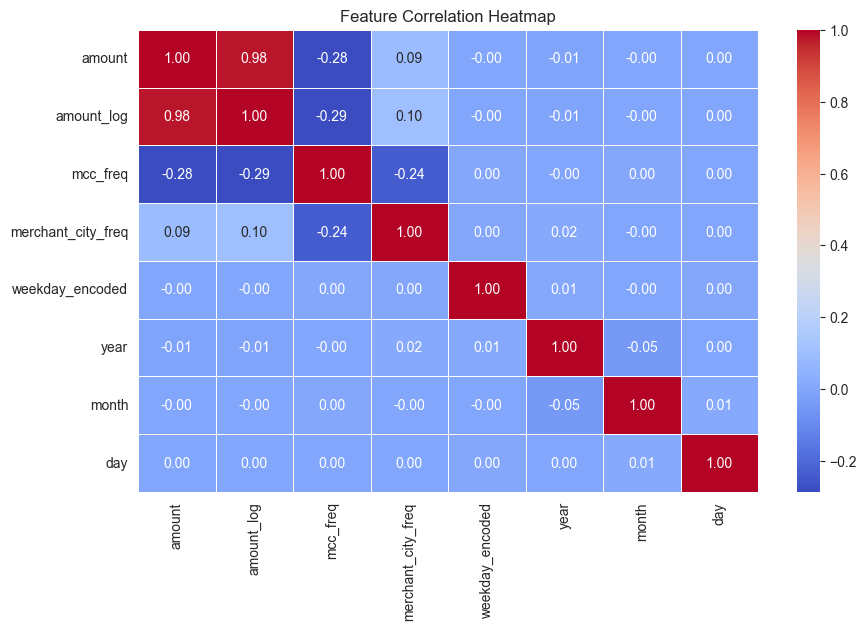

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = transactions_df[["amount", "amount_log", "mcc_freq",
                                      "merchant_city_freq", "weekday_encoded",
                                      "year", "month", "day"]].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

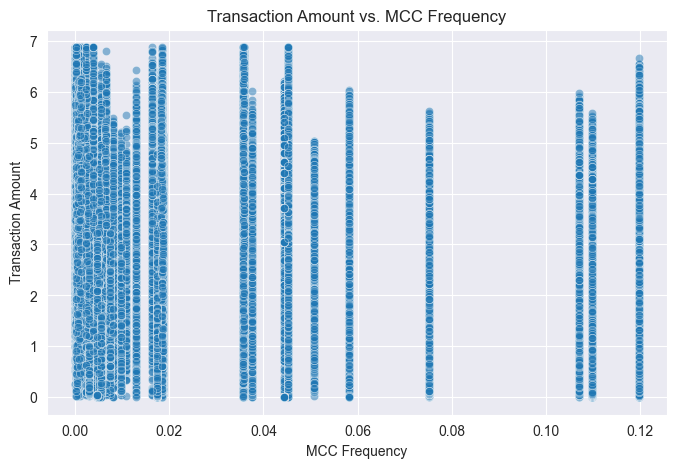

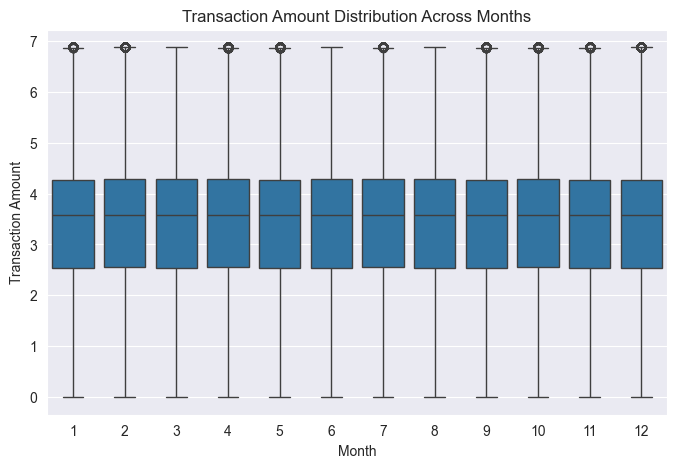

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Amount vs. MCC Frequency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=transactions_df["mcc_freq"], y=transactions_df["amount"], alpha=0.5)
plt.title("Transaction Amount vs. MCC Frequency")
plt.xlabel("MCC Frequency")
plt.ylabel("Transaction Amount")
plt.show()

# Boxplot: Transaction Amount Across Different Months
plt.figure(figsize=(8, 5))
sns.boxplot(x=transactions_df["month"], y=transactions_df["amount"])
plt.title("Transaction Amount Distribution Across Months")
plt.xlabel("Month")
plt.ylabel("Transaction Amount")
plt.show()

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_82116/120436610.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=transactions_df[col], ax=axes[row, col_pos], palette="coolwarm")
/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_82116/120436610.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=transactions_df[col], ax=axes[row, col_pos], palette="coolwarm")
/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_82116/120436610.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=transactions_df[col],

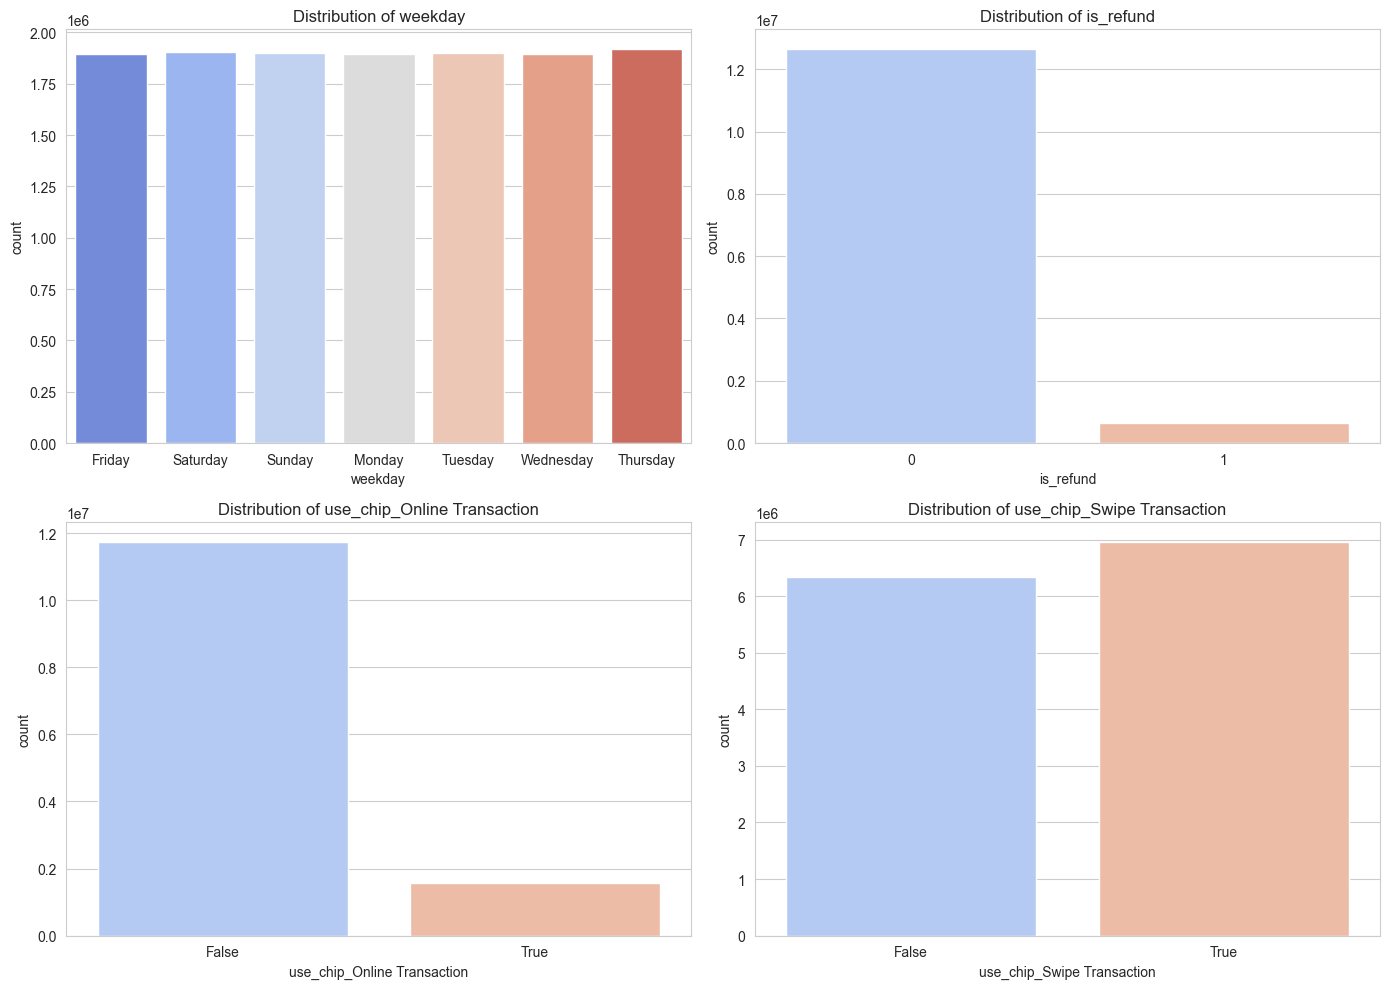

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Define categorical columns
categorical_cols = ["weekday", "is_refund", "use_chip_Online Transaction", "use_chip_Swipe Transaction"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop through categorical columns and plot
for idx, col in enumerate(categorical_cols):
    row, col_pos = divmod(idx, 2)
    sns.countplot(x=transactions_df[col], ax=axes[row, col_pos], palette="coolwarm")
    axes[row, col_pos].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Define file path
user_data_path = "../data/processed_data/processed_users.csv"

# Load dataset
users_df = pd.read_csv(user_data_path)

# Display basic info
print(" User Data Info:")
print(users_df.info())

# Display first few rows
print("\n Sample Data:")
print(users_df.head())

 User Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   latitude           2000 non-null   float64
 6   longitude          2000 non-null   float64
 7   per_capita_income  2000 non-null   float64
 8   yearly_income      2000 non-null   float64
 9   total_debt         2000 non-null   float64
 10  credit_score       2000 non-null   float64
 11  num_credit_cards   2000 non-null   int64  
 12  gender_Male        2000 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 203.2 KB
None

 Sample Data:
     id  current_age  retirement_age  birth_year  birth_month   latitude  \
0   825 

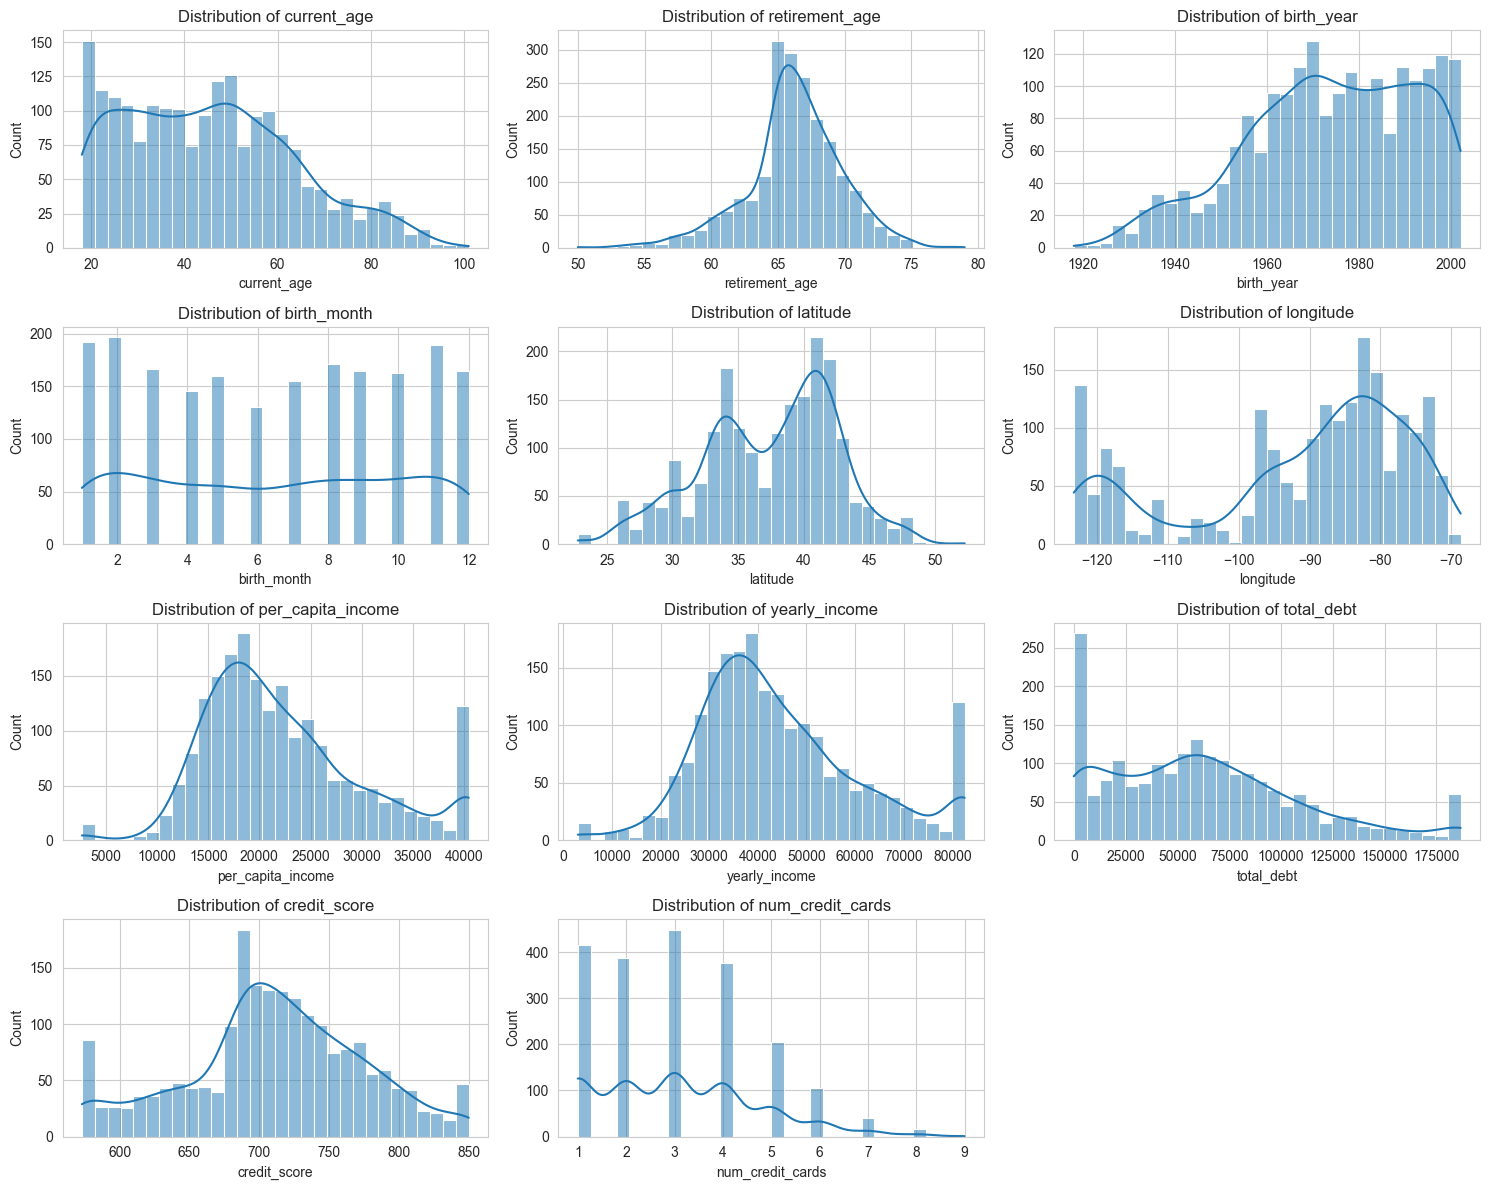

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ["current_age", "retirement_age", "birth_year", "birth_month",
                  "latitude", "longitude", "per_capita_income", "yearly_income",
                  "total_debt", "credit_score", "num_credit_cards"]

# Set up the figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(users_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove extra subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/var/folders/31/0snxt4w95wn189bxy4bgfd000000gn/T/ipykernel_82116/1513000015.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=users_df[col], ax=axes[i], palette="coolwarm")


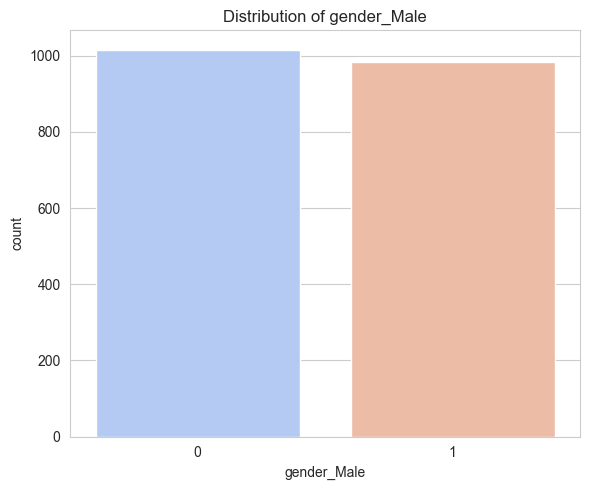

In [58]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = ["gender_Male"]

# Set up figure
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(6, 5))

# Ensure axes is iterable
if len(categorical_cols) == 1:
    axes = [axes]

# Plot count plots for categorical features
for i, col in enumerate(categorical_cols):
    sns.countplot(x=users_df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# Load the processed dataset
file_path = "../data/processed_data/processed_data.csv"
df = pd.read_csv(file_path)

# Display basic info
print("\n Dataset Overview:")
print(df.info())

# Show the first few rows
print("\n Sample Data:")
print(df.head())


 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       150000 non-null  object 
 1   amount                     150000 non-null  float64
 2   year                       150000 non-null  int64  
 3   month                      150000 non-null  int64  
 4   day                        150000 non-null  int64  
 5   weekday_num                150000 non-null  int64  
 6   is_refund                  150000 non-null  int64  
 7   mcc_freq                   150000 non-null  float64
 8   amount_log                 150000 non-null  float64
 9   per_capita_income          150000 non-null  float64
 10  yearly_income              150000 non-null  float64
 11  total_debt                 150000 non-null  float64
 12  mcc                        150000 non-null  int64  
 13  merchant_

In [2]:
# Describe numerical columns
print("\n Summary Statistics of Numerical Features:")
print(df.describe())


 Summary Statistics of Numerical Features:
              amount           year          month            day  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        3.348479    2014.518327       6.442320      15.709187   
std         1.240324       2.805886       3.410739       8.783798   
min         0.000000    2010.000000       1.000000       1.000000   
25%         2.542389    2012.000000       3.000000       8.000000   
50%         3.571221    2015.000000       6.000000      16.000000   
75%         4.276666    2017.000000       9.000000      23.000000   
max         6.873368    2019.000000      12.000000      31.000000   

         weekday_num      is_refund       mcc_freq     amount_log  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        3.001693       0.049540       0.061277       1.419006   
std         1.998532       0.216993       0.040969       0.340785   
min         0.000000       0.000000       0.000024       0

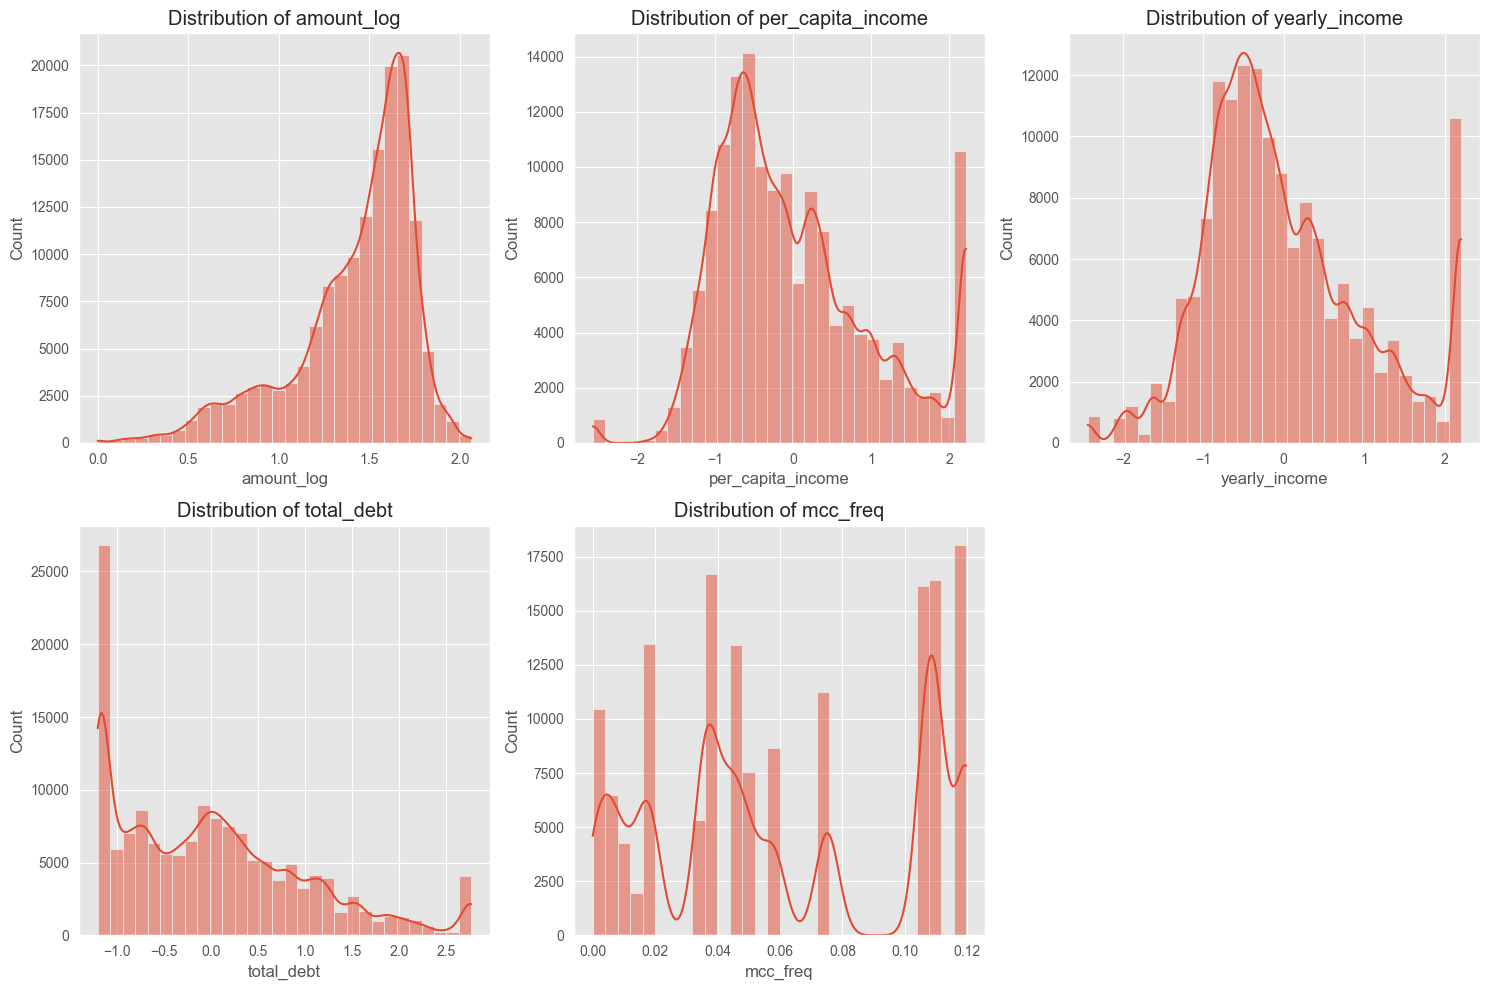

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Select numeric columns
numeric_cols = ["amount_log", "per_capita_income", "yearly_income", "total_debt", "mcc_freq"]

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

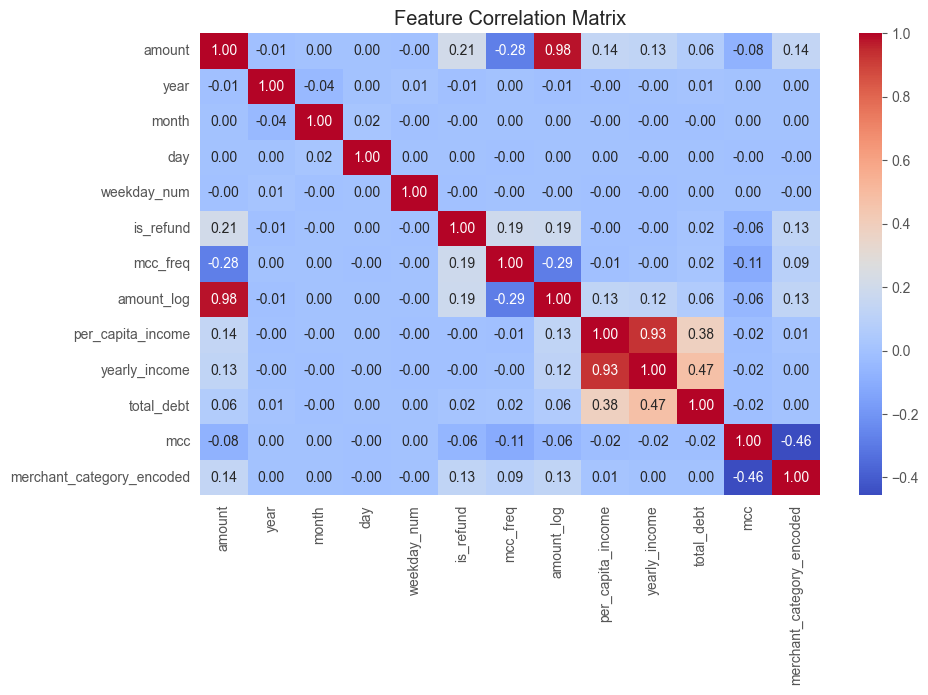

In [5]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

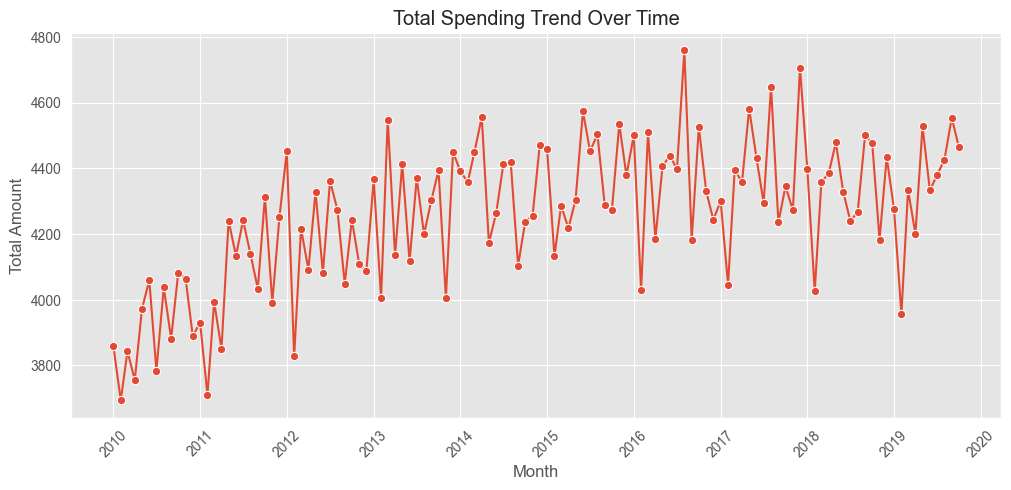

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime format if not already
df["date"] = pd.to_datetime(df["date"])

# Aggregate by month
df_monthly = df.groupby(df["date"].dt.to_period("M")).agg({"amount": "sum"}).reset_index()

# Convert period back to datetime for plotting
df_monthly["date"] = df_monthly["date"].dt.to_timestamp()

# Plot time-series
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_monthly, x="date", y="amount", marker="o")
plt.xticks(rotation=45)
plt.title("Total Spending Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

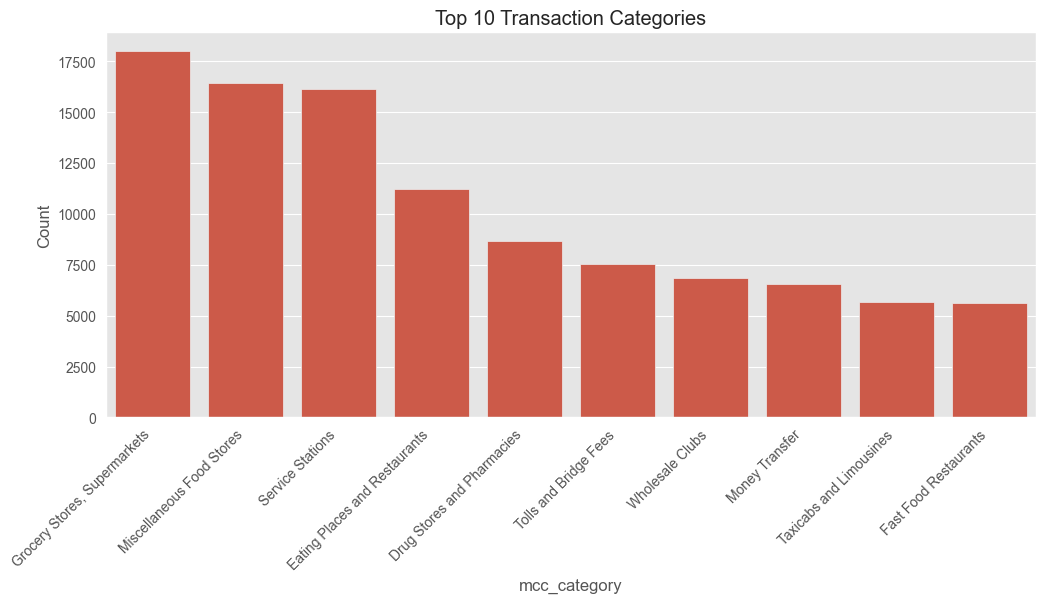

In [8]:
# Top 10 most frequent transaction categories
plt.figure(figsize=(12, 5))
top_categories = df["mcc_category"].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Transaction Categories")
plt.ylabel("Count")
plt.show()

In [1]:
import pandas as pd

# Loading processed dataset
file_path = "../data/processed_data/processed_data.csv"
df = pd.read_csv(file_path)

# Model 1: Transaction Classification Dataset
classification_features = [
    "transaction_description", "amount_log", "weekday_num",
    "is_refund", "merchant_category_encoded"
]  # Finalized features

classification_data = df[classification_features]
classification_data.to_csv("../data/processed_data/classification_data.csv", index=False)

print("Finalized Classification dataset saved successfully!")

Finalized Classification dataset saved successfully!
